# Importing Main Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from PIL import Image

# EDA

### Displaying Sample Images

In [ ]:
pth = '/content/drive/MyDrive/DL 2/dataset'

image dimensions: (232, 232)


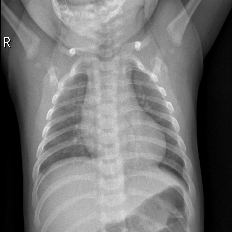

In [ ]:
# Pillow for image processing
from PIL import Image

# Getting sample normal image
normal_image_path = pth+'/train/NORMAL/NORMAL_100.png'
normal_image = Image.open(normal_image_path)
print("image dimensions:",normal_image.size)
normal_image

image dimensions: (256, 256)


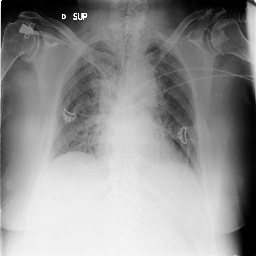

In [ ]:
# Getting sample covid image
covid_image_path = pth+'/train/COVID/COVID_100.png'
covid_image = Image.open(covid_image_path)
print("image dimensions:", covid_image.size)
covid_image

### Getting dimensions of all images to check if there are any anomalies in the images data as well as to know the range of shapes and colors

In [ ]:
# Getting train and test directories
train_dir = pth+"/train"
test_dir = pth+"/test"

In [ ]:
from itertools import chain
from matplotlib import pyplot as plt

# Creating set of dimensions
unique_dimensions = set()
unique_modes = set()

# Iterating through all images
for subdir in chain(os.listdir(train_dir), os.listdir(test_dir)):
    subdir_path = os.path.join(train_dir, subdir)
    for filename in os.listdir(subdir_path):
        file_path = os.path.join(subdir_path, filename)
        image = Image.open(file_path)
        # Adding shape and mode of give image to sets
        unique_dimensions.add(image.size[0])
        unique_dimensions.add(image.size[1])
        unique_modes.add(image.mode)

print("unique modes:", unique_modes)
print("unique dimensions:", unique_dimensions)

unique modes: {'RGBA', 'RGB'}
unique dimensions: {256, 232}


#### All images are at diffrent sizes they will have to be resized into same dimension later

In [ ]:
# Setting the dimensions for images to be resized to
DIMENSIONS = [100, 100]

### For curiosity displaying all images with modes == "P"

In [ ]:
import os
from itertools import chain
from PIL import Image
from matplotlib import pyplot as plt

# Define the absolute paths to directories
train_dir = '/content/drive/MyDrive/DL 2/dataset/train'
test_dir = '/content/drive/MyDrive/DL 2/dataset/test'

# Debug: Print the current working directory
print("Current Working Directory:", os.getcwd())

# Debug: Verify the directory structure
print("Contents of /content/drive/MyDrive/DL 2/dataset:")
print(os.listdir('/content/drive/MyDrive/DL 2/dataset'))

# Ensure the directories exist
if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Training directory does not exist: {train_dir}")
if not os.path.exists(test_dir):
    raise FileNotFoundError(f"Testing directory does not exist: {test_dir}")

# Iterating through all images in train and test directories
for subdir in chain(os.listdir(train_dir), os.listdir(test_dir)):
    if subdir in os.listdir(train_dir):
        subdir_path = os.path.join(train_dir, subdir)
    else:
        subdir_path = os.path.join(test_dir, subdir)

    if not os.path.exists(subdir_path):
        print(f"Subdirectory does not exist: {subdir_path}")
        continue

    for filename in os.listdir(subdir_path):
        file_path = os.path.join(subdir_path, filename)
        try:
            image = Image.open(file_path)
            # Displaying images if mode is "P"
            if image.mode == "P":
                plt.axis("off")
                plt.imshow(image)
                plt.show()
        except Exception as e:
            print(f"Error processing file {file_path}: {e}")


Current Working Directory: /content
Contents of /content/drive/MyDrive/DL 2/dataset:
['test', 'train']


In [ ]:
import os
from itertools import chain
from PIL import Image
from matplotlib import pyplot as plt

# Define the absolute paths to directories
train_dir = '/content/drive/MyDrive/DL 2/dataset/train'
test_dir = '/content/drive/MyDrive/DL 2/dataset/test'

# Ensure the directories exist
if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Training directory does not exist: {train_dir}")
if not os.path.exists(test_dir):
    raise FileNotFoundError(f"Testing directory does not exist: {test_dir}")

# Iterating through all images in train and test directories
for subdir in chain(os.listdir(train_dir), os.listdir(test_dir)):
    if subdir in os.listdir(train_dir):
        subdir_path = os.path.join(train_dir, subdir)
    else:
        subdir_path = os.path.join(test_dir, subdir)

    if not os.path.exists(subdir_path):
        print(f"Subdirectory does not exist: {subdir_path}")
        continue

    for filename in os.listdir(subdir_path):
        file_path = os.path.join(subdir_path, filename)
        try:
            image = Image.open(file_path)
            # Displaying images if mode is "P"
            if image.mode == "P":
                plt.axis("off")
                plt.imshow(image)
                plt.show()
        except Exception as e:
            print(f"Error processing file {file_path}: {e}")


In [ ]:
# Iterating through all images
for subdir in chain(os.listdir(train_dir), os.listdir(test_dir)):
    subdir_path = os.path.join(train_dir, subdir)
    for filename in os.listdir(subdir_path):
        file_path = os.path.join(subdir_path, filename)
        image = Image.open(file_path)

        # Displaying images
        if image.mode == "P":
            plt.axis("off")
            plt.imshow(image)
            plt.show()

# Creating CNN model

In [ ]:
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Activation, Dropout
from keras import backend
import tensorflow as tf
import keras

# Creating simple model
def simple_model():
    # Clearning any model memory
    backend.clear_session()

    # Creating Sequential model
    model = Sequential()

    # Adding convolution layers
    model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform', activation="relu", input_shape=(*DIMENSIONS, 3)))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform', activation="relu"))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(128, (3,3), kernel_initializer='he_uniform', activation="relu"))
    model.add(MaxPooling2D(2, 2))

    # Flattening the output and adding Dense layers
    model.add(Flatten())
    model.add(Dense(512, activation="relu", kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation="relu", kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.summary()

    return model

In [ ]:
# Creating advanced model
def advanced_model():
    # Clearning any model memory
    backend.clear_session()

    # Creating Sequential model
    model = Sequential()

    # Adding convolution layers
    model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform', input_shape=(*DIMENSIONS, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(128, (3,3), kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3,3), kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3,3), kernel_initializer='he_uniform'))
    model.add(MaxPooling2D(2, 2))

    # Flattening the output and adding Dense layers
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.summary()

    return model

### Creating Image Generator Pipeline

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Applying data augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=50,
      width_shift_range=0.25,
      height_shift_range=0.25,
      shear_range=0.3,
      zoom_range=0.3,
      horizontal_flip=True,
      brightness_range=(0.8, 1.2),
      fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Flow from directory images using train_datagen and valid_datagen generators

train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=tuple(DIMENSIONS),  # All images will be resized to 100x100
        class_mode='binary') # Since we use binary_crossentropy loss, we need binary labels

valid_generator = valid_datagen.flow_from_directory(
        test_dir,  # This is the source directory for training images
        target_size=tuple(DIMENSIONS),  # All images will be resized to 100x100
        class_mode='binary')

Found 3428 images belonging to 2 classes.
Found 3428 images belonging to 2 classes.


### Compiling And Training The Model

In [ ]:
# Creating new model
model = simple_model()
# model = advanced_model()

# Parameters
BATCH_SIZE = 64
EPOCHS = 120

model.compile(loss='binary_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 128)       0

In [ ]:
# Training the model
history = model.fit(
      train_generator,
      validation_data=valid_generator,
      batch_size=BATCH_SIZE,
      epochs=EPOCHS,
      callbacks=[tf.keras.callbacks.LearningRateScheduler(lambda epoch, lr: lr if epoch < 60 else lr * tf.math.exp(-0.05))],
      verbose=1)

Epoch 1/120
108/108 [==============================] - 49s 390ms/step - loss: 0.5335 - accuracy: 0.7733 - val_loss: 0.1890 - val_accuracy: 0.9326 - lr: 0.0010
Epoch 2/120
108/108 [==============================] - 47s 433ms/step - loss: 0.3088 - accuracy: 0.8769 - val_loss: 0.1218 - val_accuracy: 0.9589 - lr: 0.0010
Epoch 3/120
108/108 [==============================] - 42s 388ms/step - loss: 0.2393 - accuracy: 0.9104 - val_loss: 0.0847 - val_accuracy: 0.9743 - lr: 0.0010
Epoch 4/120
108/108 [==============================] - 41s 385ms/step - loss: 0.1925 - accuracy: 0.9271 - val_loss: 0.0917 - val_accuracy: 0.9746 - lr: 0.0010
Epoch 5/120
108/108 [==============================] - 42s 388ms/step - loss: 0.1848 - accuracy: 0.9320 - val_loss: 0.0993 - val_accuracy: 0.9615 - lr: 0.0010
Epoch 6/120
108/108 [==============================] - 42s 393ms/step - loss: 0.1647 - accuracy: 0.9452 - val_loss: 0.0776 - val_accuracy: 0.9772 - lr: 0.0010
Epoch 7/120
108/108 [=========================

# Testing CNN model

### Plotting Learning Curves

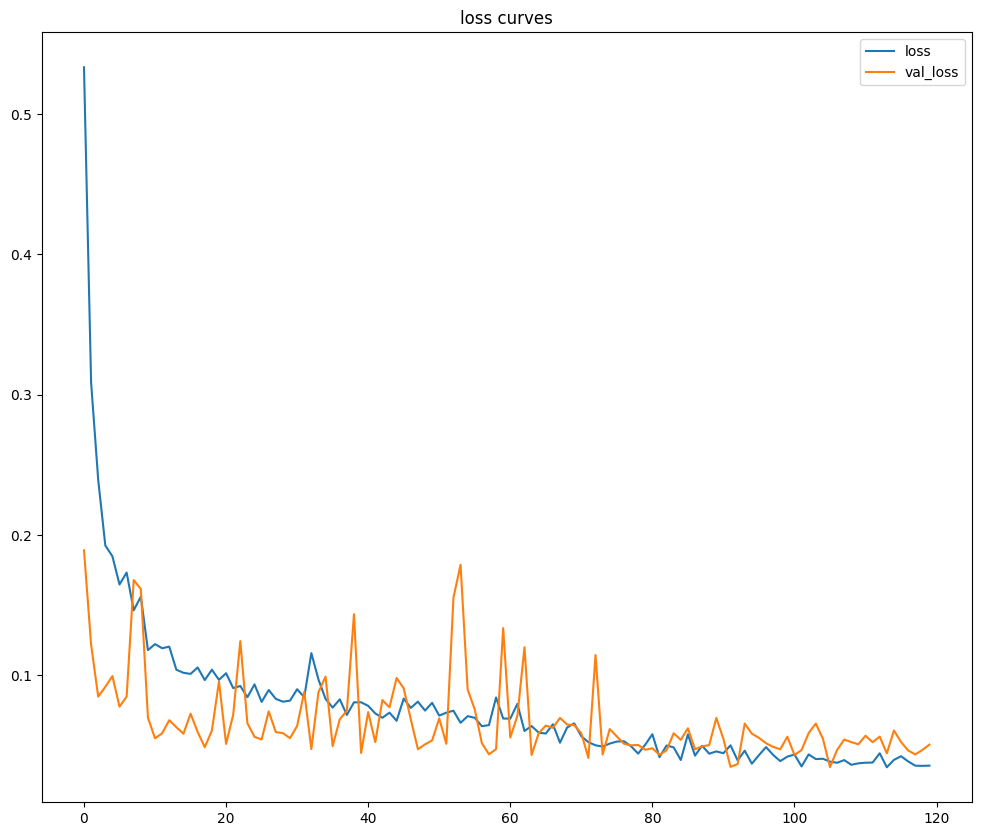

In [ ]:
import matplotlib.pyplot as plt

# Plotting loss curves
plt.figure(figsize=(12,10))
plt.title("loss curves")
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

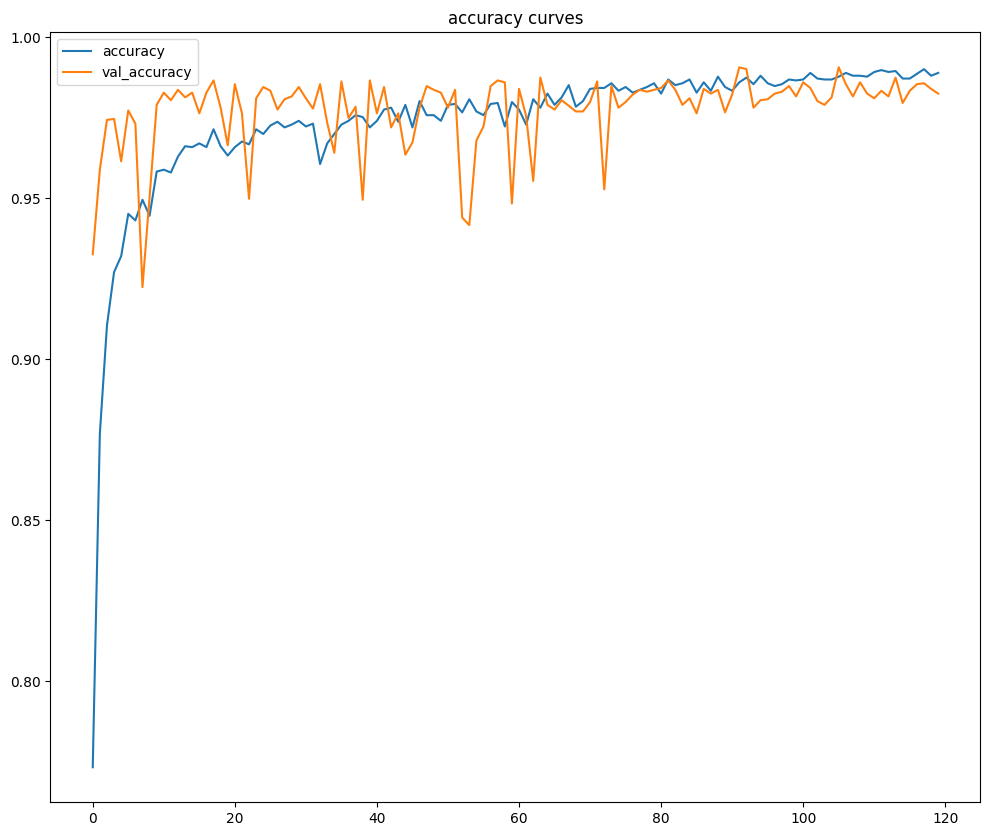

In [ ]:
# Plotting accuracy curves
plt.figure(figsize=(12,10))
plt.title("accuracy curves")
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()

### Displaying Confusion Matrix

In [ ]:
# Creating new generator for test data
test_generator = valid_datagen.flow_from_directory(
        test_dir,  # This is the source directory for test images
        target_size=(DIMENSIONS),  # All images will be resized to 100x100
        class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
        shuffle=False)  # We don't want to shuffle the test data

# Predicting labels for all test images
y_pred = model.predict(test_generator)
y_pred[:10]

Found 3428 images belonging to 2 classes.
108/108 [==============================] - 16s 144ms/step


array([[1.2802998e-07],
       [2.8742691e-06],
       [5.6602321e-08],
       [2.8417575e-05],
       [1.1997198e-03],
       [7.1135437e-05],
       [2.1508695e-03],
       [4.1393397e-04],
       [4.3320855e-05],
       [1.0255700e-03]], dtype=float32)

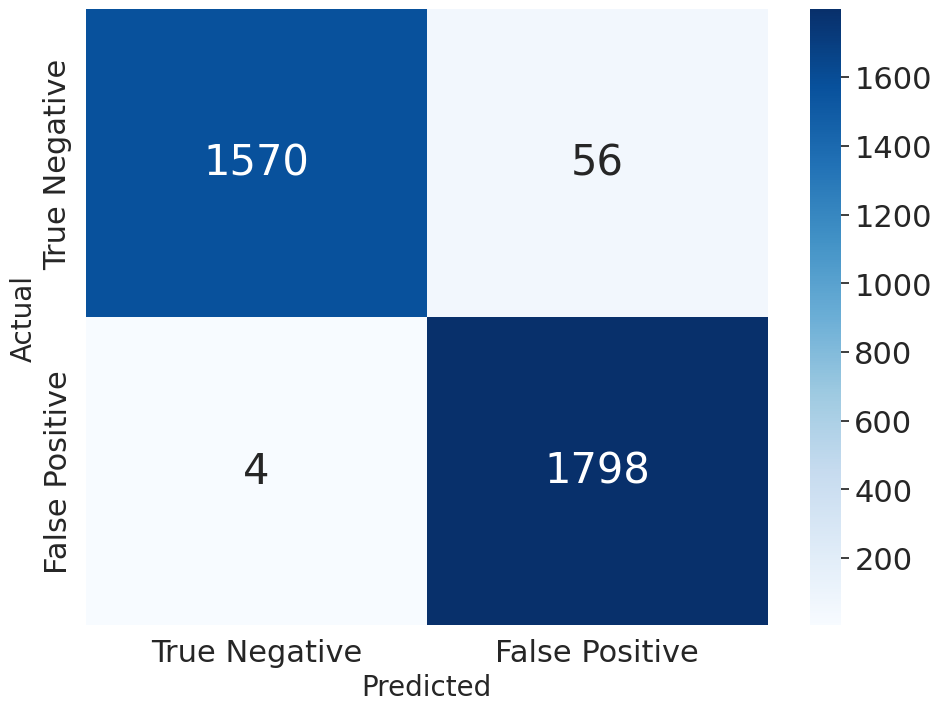

In [ ]:
from sklearn.metrics import confusion_matrix

# Getting the true labels for the test data
y_true = test_generator.labels

# Converting the predicted labels to binary labels
y_pred = np.round(y_pred)

# Calculating the confusion matrix
confusion_matrix = confusion_matrix(y_true, y_pred)

# Displaying the confusion matrix
import seaborn as sns
from seaborn import heatmap

plt.figure(figsize=(11,8))
sns.set(font_scale=2)

heatmap(confusion_matrix,
        annot=True,
        annot_kws={"size": 30},
        fmt='g',
        cmap='Blues',
        xticklabels=['True Negative', 'False Positive'],
        yticklabels=['True Negative', 'False Positive'])

plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20);

### Displaying those images that were wrongly classified

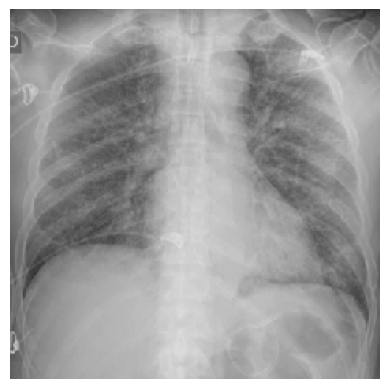

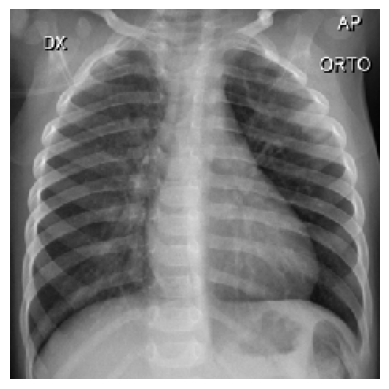

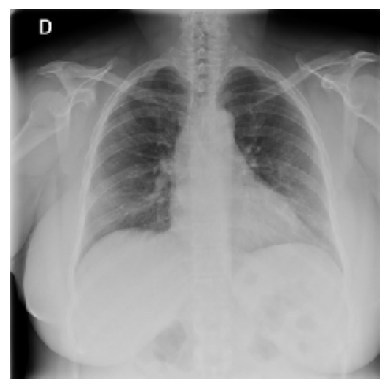

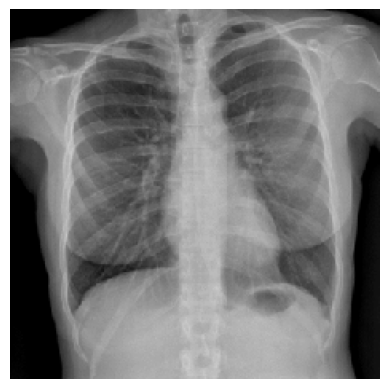

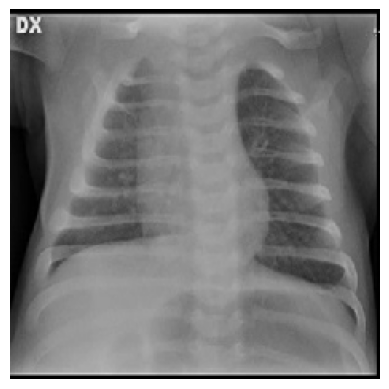

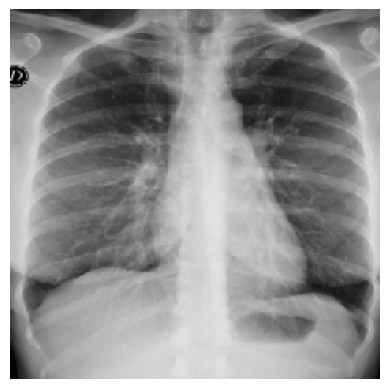

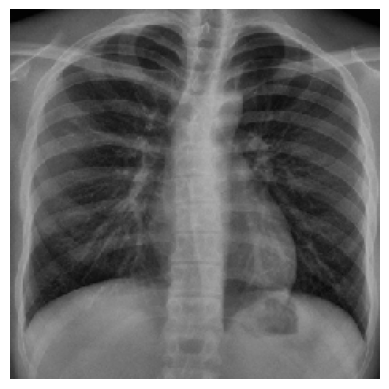

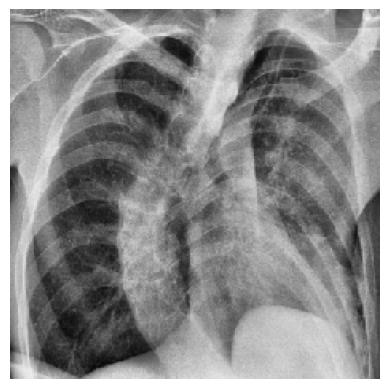

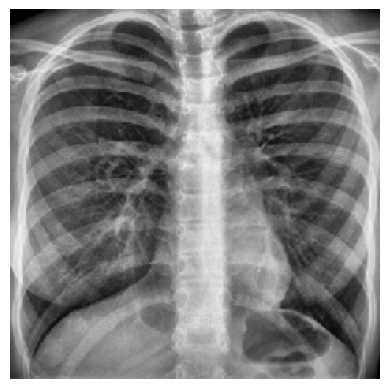

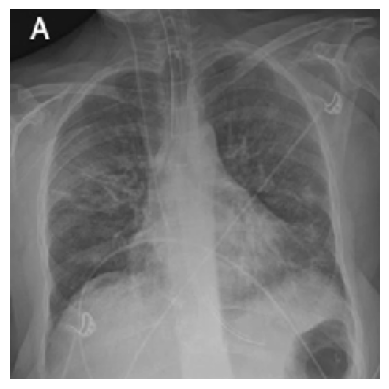

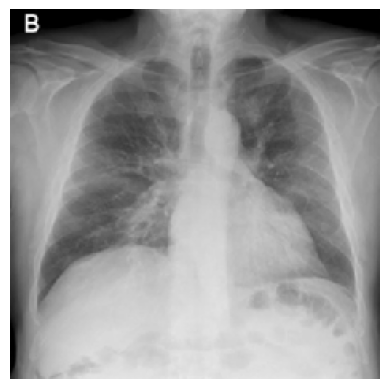

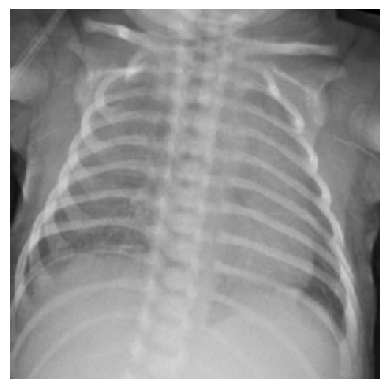

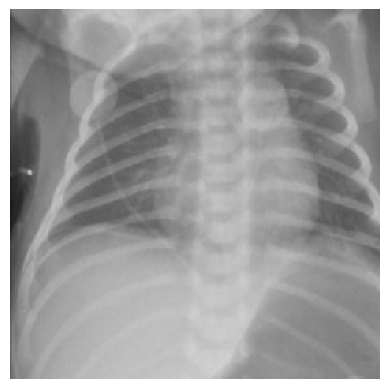

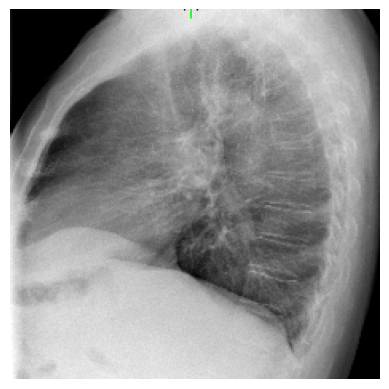

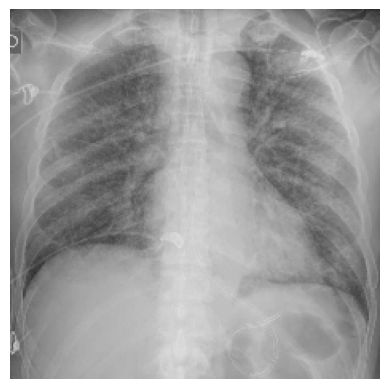

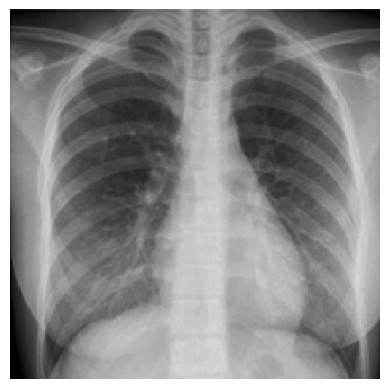

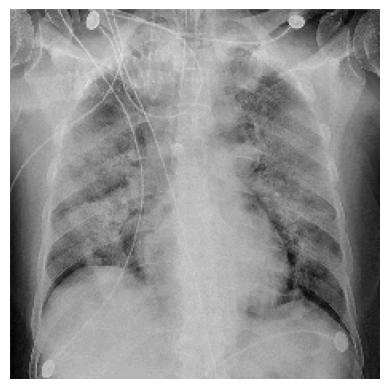

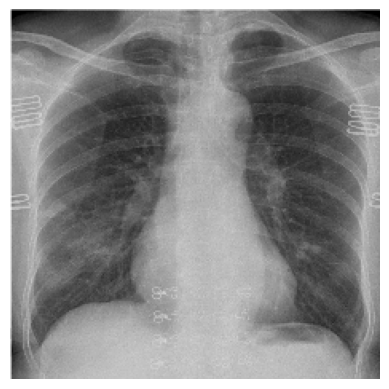

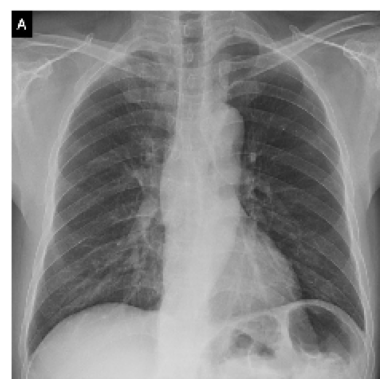

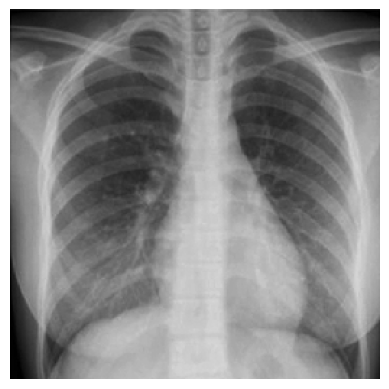

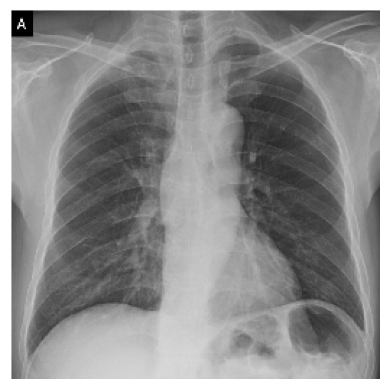

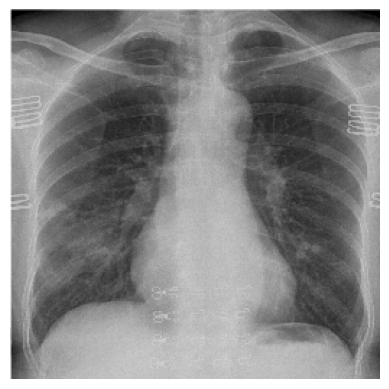

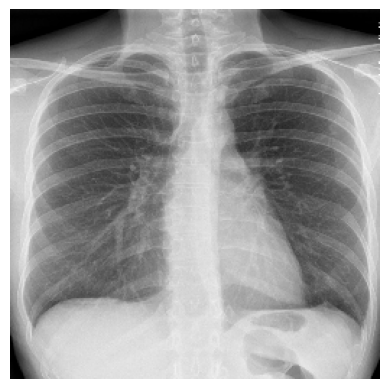

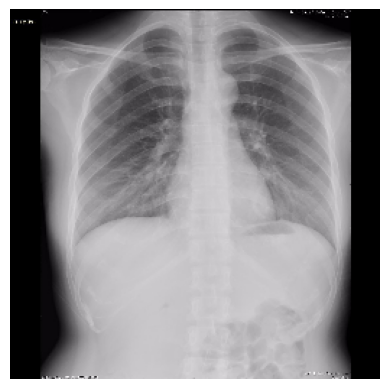

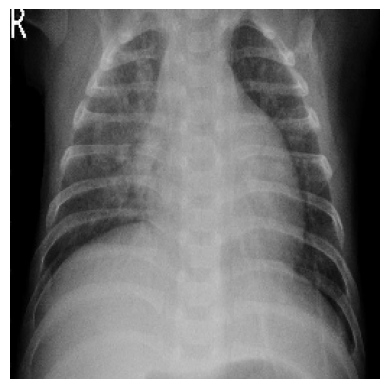

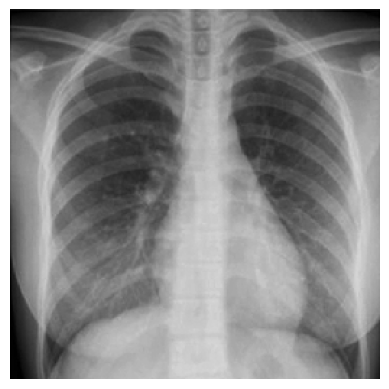

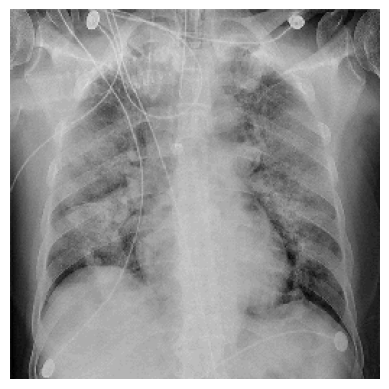

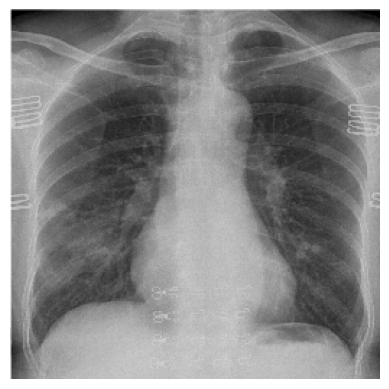

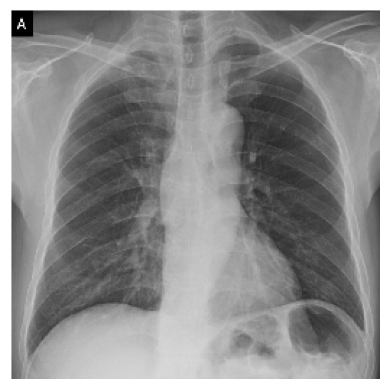

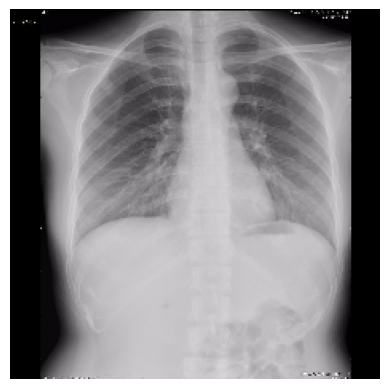

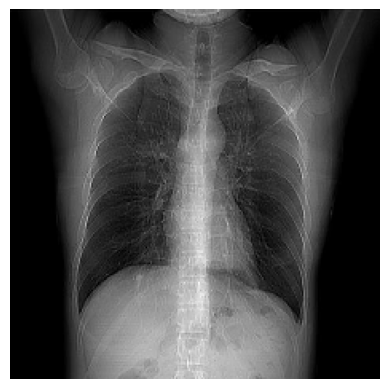

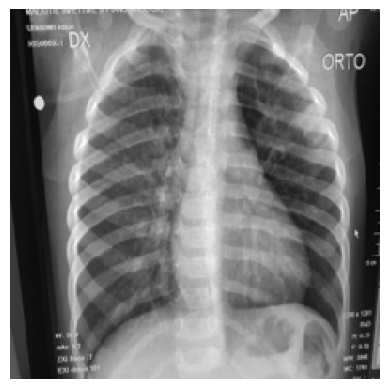

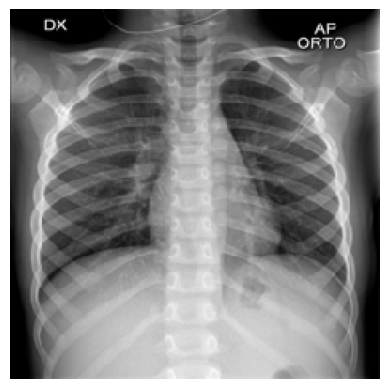

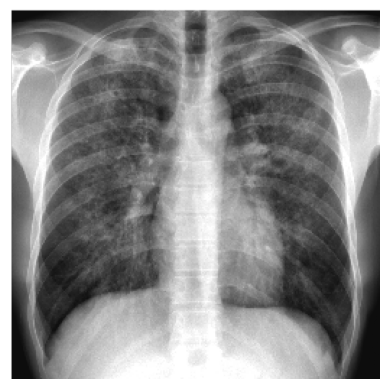

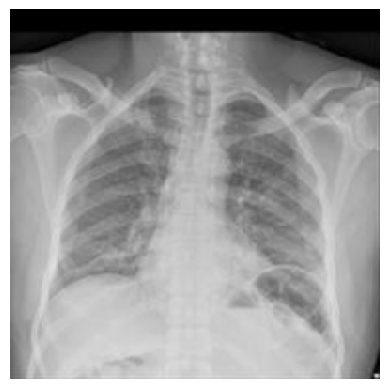

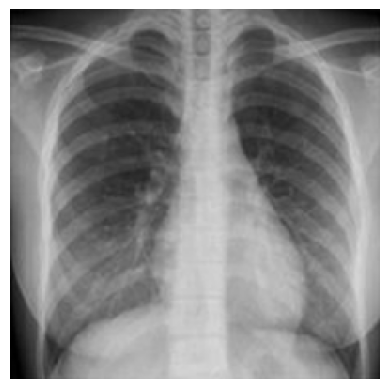

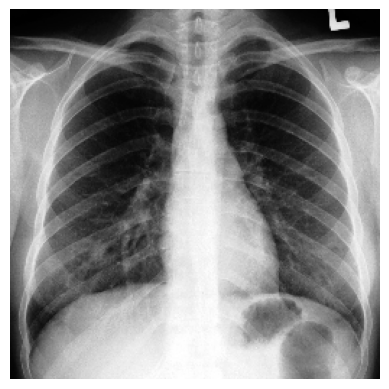

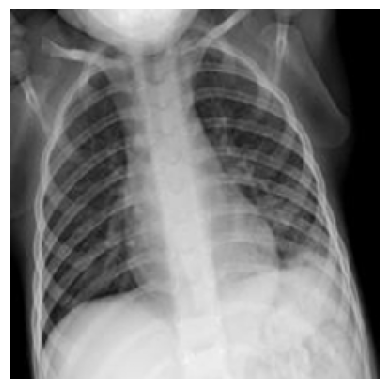

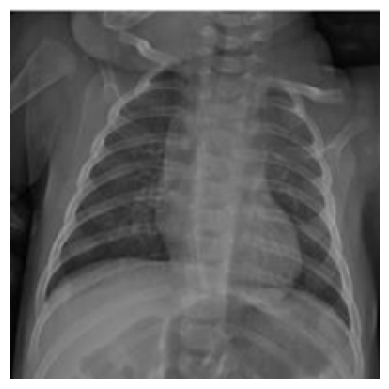

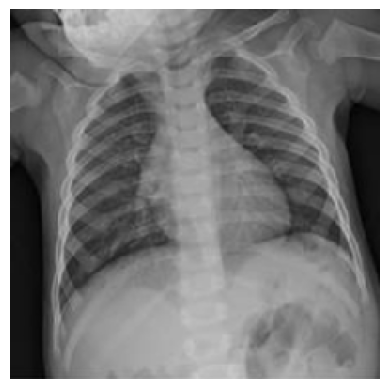

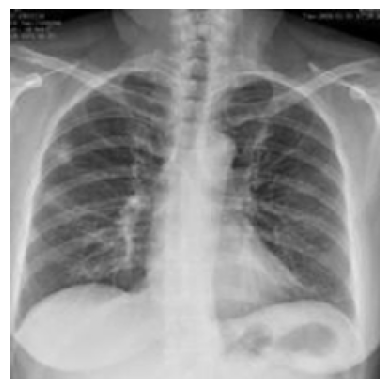

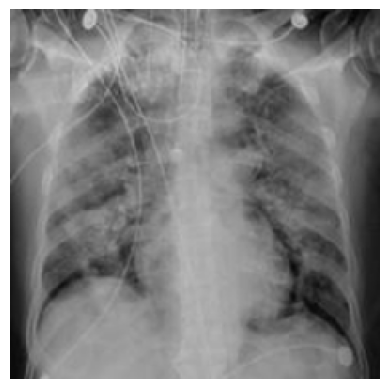

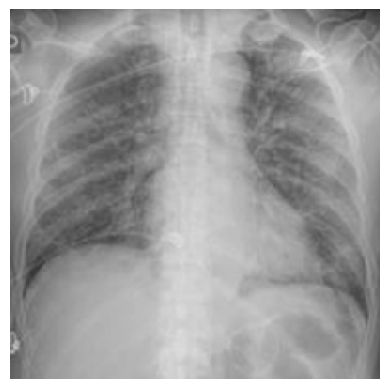

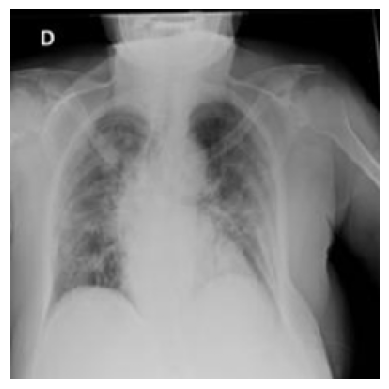

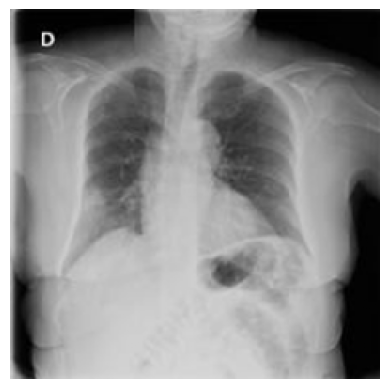

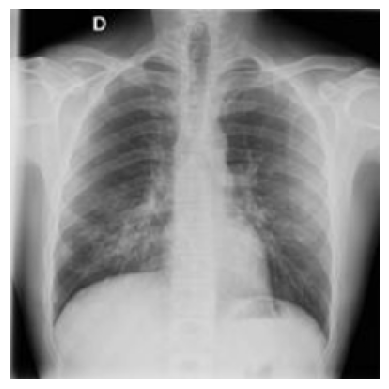

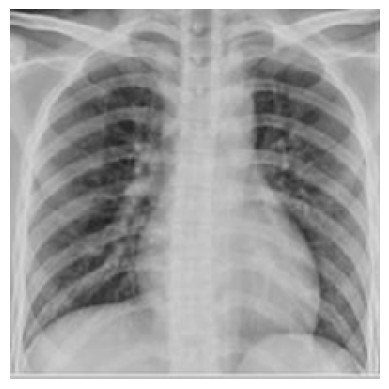

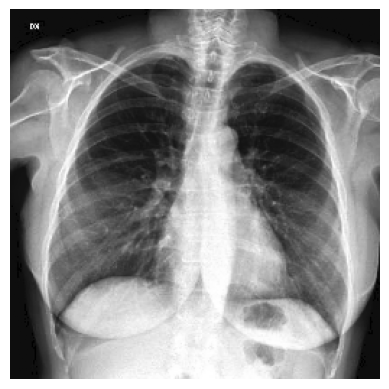

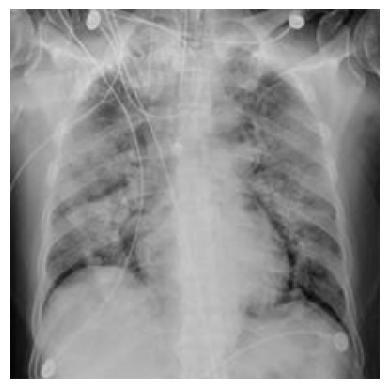

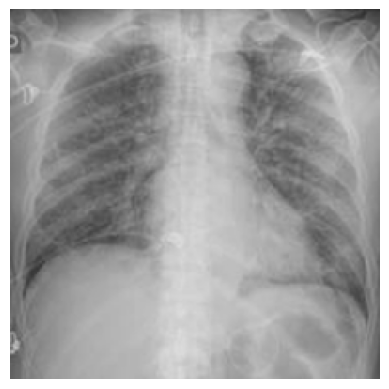

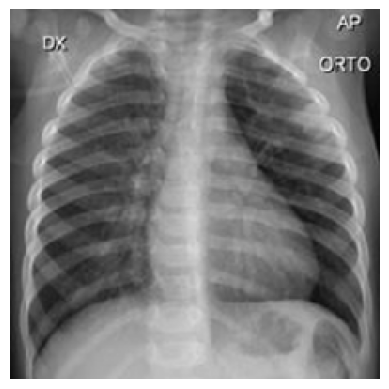

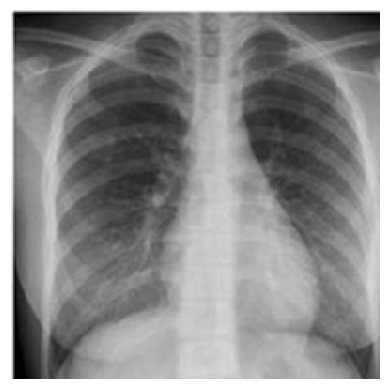

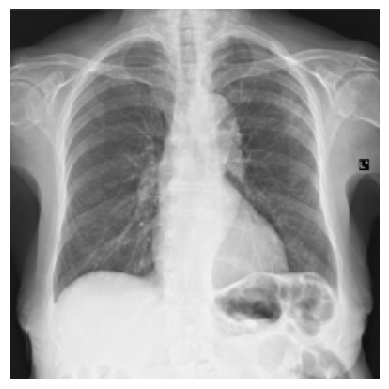

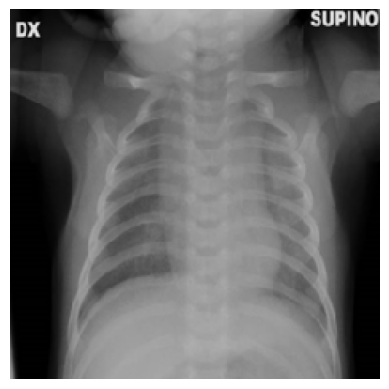

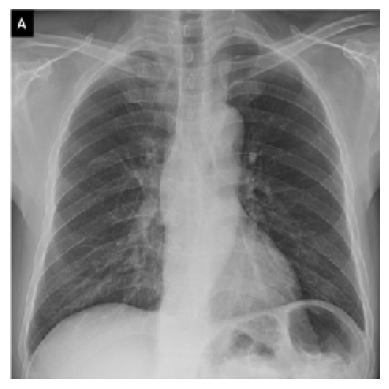

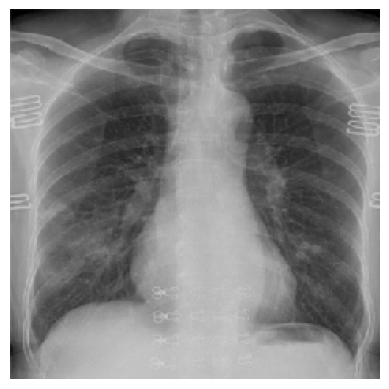

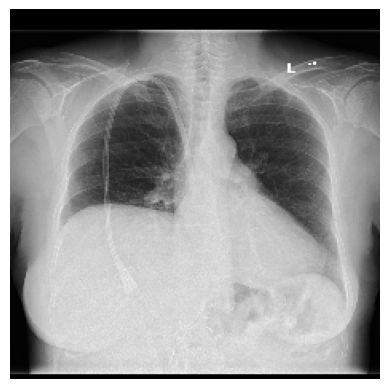

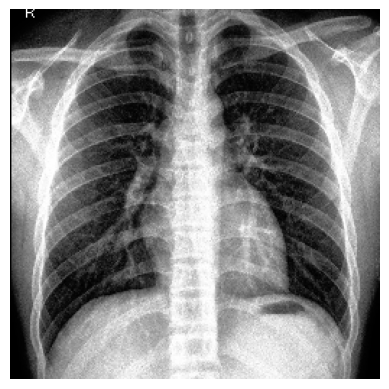

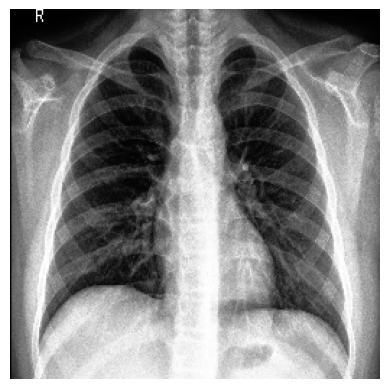

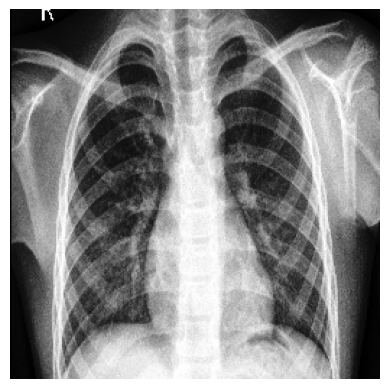

In [ ]:
# Getting indecies of wrongly classified images
misclassified_indices = np.where(y_true.reshape(-1,1) != y_pred)[0]

# Displaying all wrongly classified images
for i in misclassified_indices:
    image_path = test_generator.filepaths[i]
    image = plt.imread(image_path)
    plt.imshow(image)
    plt.axis("off")
    plt.show()